In [21]:
import numpy as np 
import pandas as pd

In [22]:
df=pd.read_csv(r'Desktop\Deep_learning\Neural_network\ANN(Artificial Neural Network)\Churn_Modelling.csv')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [26]:
df.duplicated().sum()

0

In [28]:
df.drop(columns=['RowNumber', 'CustomerId','Surname'],inplace=True)

In [29]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [42]:
dummies=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True).astype(int)

In [45]:
dummies.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0


In [46]:
X=dummies.drop(columns=['Exited'])
y=dummies['Exited']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=1)

In [47]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2694,628,29,3,113146,2,0,1,124749,1,0,1
5140,626,29,4,105767,2,0,0,41104,0,0,0
2568,612,47,6,130024,1,1,1,45750,1,0,0
3671,646,52,6,111739,2,0,1,68367,1,0,0
7427,714,33,8,122017,1,0,0,162515,0,1,1


In [49]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [50]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [52]:
model= Sequential()
model.add(Dense(3,activation='sigmoid', input_dim=11))
model.add(Dense(1,activation='sigmoid'))

C:\Users\jroun\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [85]:
model.compile(loss='binary_crossentropy', optimizer='Adam',metrics=['accuracy'])

In [86]:
history = model.fit(X_train_scaled,y_train, epochs=10, validation_split=0.2)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8337 - loss: 0.3914 - val_accuracy: 0.8350 - val_loss: 0.3910
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - accuracy: 0.8386 - loss: 0.3911 - val_accuracy: 0.8356 - val_loss: 0.3902
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - accuracy: 0.8445 - loss: 0.3816 - val_accuracy: 0.8356 - val_loss: 0.3894
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - accuracy: 0.8393 - loss: 0.3838 - val_accuracy: 0.8363 - val_loss: 0.3887
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - accuracy: 0.8332 - loss: 0.3983 - val_accuracy: 0.8369 - val_loss: 0.3882
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - accuracy: 0.8411 - loss: 0.3797 - val_accuracy: 0.8388 - val_loss: 0.3872
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - accuracy: 0.8389 - loss: 0.3873 - val_accuracy: 0.8369 - val_loss: 0.3867
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - accuracy: 0.8428 - loss: 0.3782 - va

In [87]:
y_log=model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step


In [88]:
y_pred=np.where(y_log>0.5,1,0)

In [89]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.842

In [90]:
import matplotlib.pyplot as plt

In [91]:
history.history

{'accuracy': [0.8393750190734863,
  0.8409374952316284,
  0.8409374952316284,
  0.8412500023841858,
  0.8414062261581421,
  0.840624988079071,
  0.8414062261581421,
  0.8415625095367432,
  0.8417187333106995,
  0.8431249856948853],
 'loss': [0.3885635733604431,
  0.38777846097946167,
  0.3869839906692505,
  0.38626235723495483,
  0.38558411598205566,
  0.38494381308555603,
  0.38430625200271606,
  0.38376784324645996,
  0.3831270933151245,
  0.3825487196445465],
 'val_accuracy': [0.8349999785423279,
  0.8356249928474426,
  0.8356249928474426,
  0.8362500071525574,
  0.8368750214576721,
  0.8387500047683716,
  0.8368750214576721,
  0.8399999737739563,
  0.8387500047683716,
  0.8393750190734863],
 'val_loss': [0.39097338914871216,
  0.3901912271976471,
  0.38937246799468994,
  0.38872891664505005,
  0.3881567716598511,
  0.387201189994812,
  0.38668137788772583,
  0.38577955961227417,
  0.3851813077926636,
  0.384543776512146]}

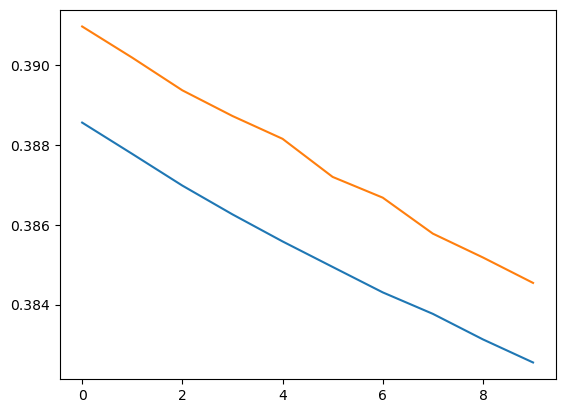

In [92]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


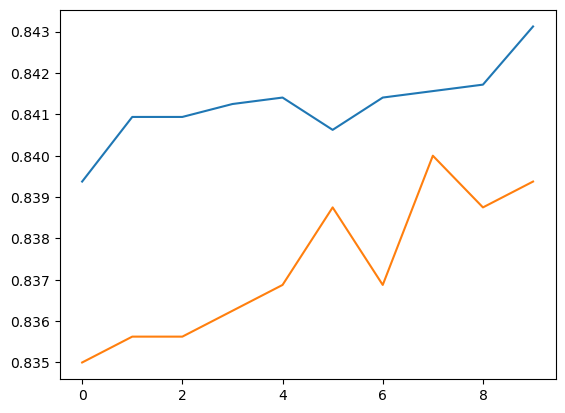

In [93]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
